Document for Model training



Importing packages

In [2]:
import matplotlib.pyplot as plt
from SynDataFunctionality.TreeLib import Tree, gen_tree
import numpy as np
from SynDataFunctionality.genInputFromLabel import labelToInput


Setting Constants

In [3]:
startX = 5
startY = 360
startAngle = 0
starWidth = 20
stopWidth = 2
startLength = 20
bifurcProb = 0.3 #should be changed to prop dist dependent on number of 'straigt' lines

Make some trees 

In [4]:
from SynDataFunctionality.saveSynData import gen_syn_data
import torch.utils.data as td
from DataSets import SynData

Make and save some synthetic data

In [22]:
lst = [startX, startY, starWidth, startLength, startAngle, stopWidth, 0.3]
num = 5

# make num samples
gen_syn_data("SynData/SynInput", "SynData/SynLabel", lst, (736, 736), num)


Test that we can make a dataSet and it outputs data as expected

In [6]:
from torchvision.transforms import Resize
import torchvision

SynDataSet = SynData("SynData/synInput", "SynData/synLabel")

#Test we can retrieve data from Dataset
test, lab = SynDataSet[0]
print(test.shape)
print(lab.shape)


torch.Size([1, 736, 736])
torch.Size([1, 736, 736])


Visualize synthetic generated data

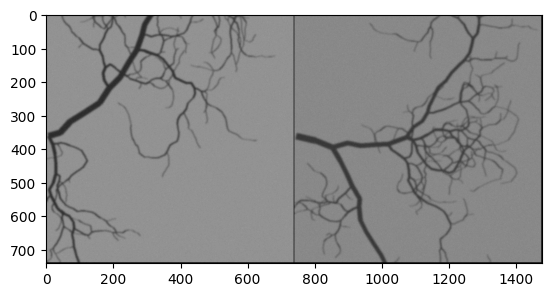

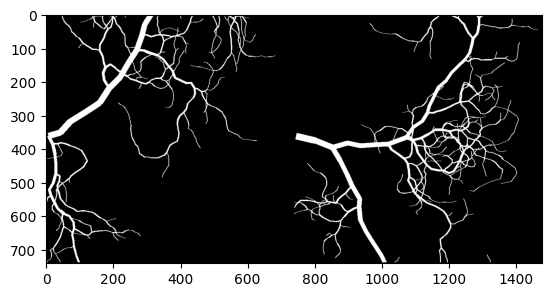

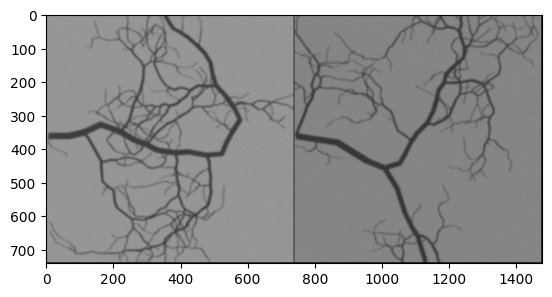

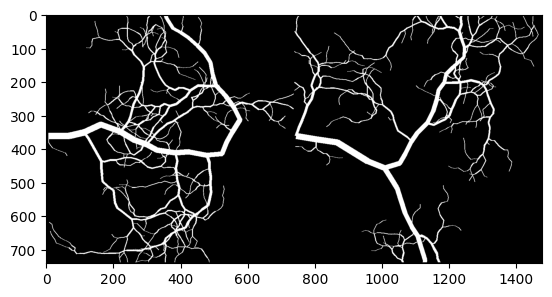

In [7]:
import torchvision

#test that dataloader works, and show images
test_loader = td.DataLoader(SynDataSet, batch_size=2)

testIter = iter(test_loader)
for i in range(len(testIter)):
    imgs, labs = next(testIter)
    grid = torchvision.utils.make_grid(imgs) #.numpy()[0] hack to show tensor in plt
    plt.imshow(grid.numpy()[0], cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs)
    plt.imshow(lab_grid.numpy()[0], cmap="gray", vmin=0, vmax=1)
    plt.show()

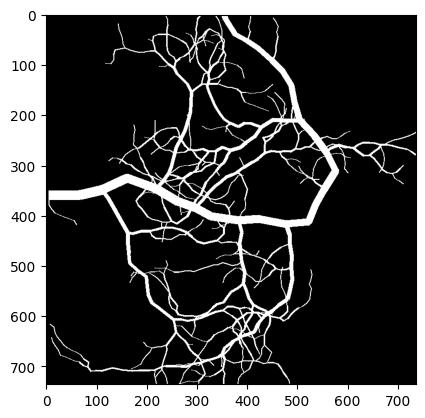

In [8]:
lab, dat = SynDataSet[2]
plt.imshow(dat.numpy()[0], cmap="gray")
plt.imsave("test.PNG", dat.numpy()[0])
plt.show()

Check that transformations can be applied to dataSet

In [10]:
#Test transformations work correctly on dataloader:
from torchvision.transforms import RandomVerticalFlip, RandomHorizontalFlip, Resize, CenterCrop, Normalize
from torchvision.transforms.functional import rotate
import torchvision

t_both = [RandomHorizontalFlip(p=0.5),  RandomVerticalFlip(p=0.5)]
#Maybe normalize imgs automatically in dataSet

In [14]:
TransDataSet = SynData("SynData/synInput", "SynData/synLabel", transforms_both=t_both, repeat_channels=True)

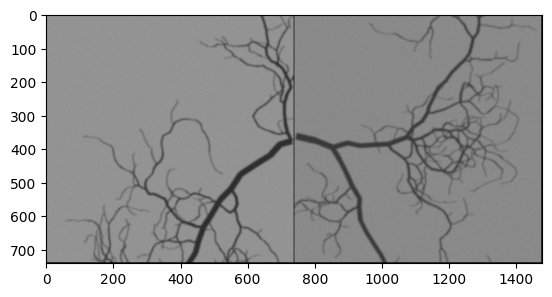

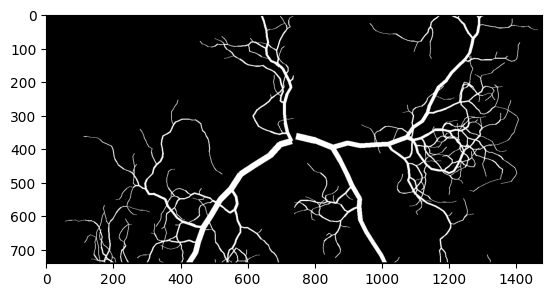

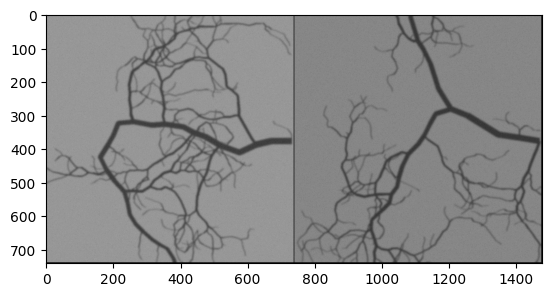

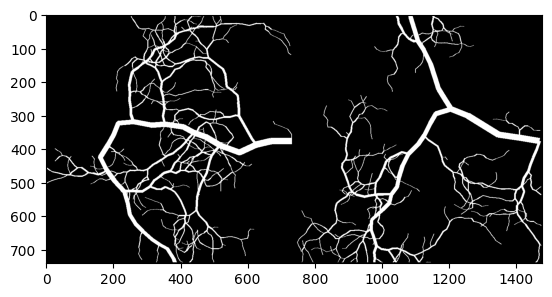

In [15]:
import torchvision
import numpy as np

#test that dataloader works, and show images
trans_loader = td.DataLoader(TransDataSet, batch_size=2)

transIter = iter(trans_loader)
for i in range(len(transIter)):
    imgs, labs = next(transIter)
    grid = torchvision.utils.make_grid(imgs).numpy()[0]
    #print(np.amax(np.array(imgs)))
    #print(np.amin(np.array(imgs)))
    plt.imshow(grid+1, cmap="gray", vmin=0, vmax=255)
    plt.show()
    lab_grid = torchvision.utils.make_grid(labs).numpy()[0]
    plt.imshow(lab_grid, cmap="gray", vmin=0, vmax=1)
    plt.show()

Experiment with Basic Unet (to test whether it works)

Import packages and files for Unet and training

In [16]:
from Unet.UNetBasic import UnetBasic
import torch
import torch.optim as optim
import torch.nn as nn
import torch.cuda


In [17]:
#make Unet

net1 = UnetBasic()


#Try to use cuda machine

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#check which device we are on

print(device)


cpu


Make training and testing images. Apply random transformations to them:

In [27]:
#note, we comment our genSynDat, as otherwise we kill previous generated data.


#Make 300 samples for training data:
#genSynDat("SynData/SynInputTrain", "SynData/SynLabelTrain", lst, (736, 736), 300)

#Make 50 samples as test data:
#genSynDat("SynData/SynInputTest", "SynData/SynLabelTest", lst, (736, 736), 50)

In [19]:
#Make datasets

trainingData = SynData("SynData/synInput", "SynData/synLabel", t_both)
testData = SynData("SynData/synInput", "SynData/synLabel", t_both)

trainLoader = td.DataLoader(trainingData, shuffle=True)
testLoader = td.DataLoader(testData, shuffle=True)

Training our basic Unet

In [29]:
from trainingFunctionality import trainLoop

net1.to(device) #For now is cpu, but will hopefully be CUDA later
net1 = net1.float() #hack that should remove float error

#Adam for now
optimizer = optim.Adam(net1.parameters(), lr=0.001)
criterion = nn.BCELoss()
criterion.to(device)
epochs = 5

#Training, pray for me. Idea; only print av. epoch error. Decide later
trainLoss, testLoss, net = trainLoop(net1, optimizer, criterion, device, epochs, trainLoader, testLoader, print_interv=5)

[1,     5] loss: 0.132
[1,    10] loss: 0.114
[1,    15] loss: 0.104
[1,    20] loss: 0.097
[1,    25] loss: 0.090
[1,    30] loss: 0.085
[1,    35] loss: 0.082
[1,    40] loss: 0.078
[1,    45] loss: 0.074
[1,    50] loss: 0.070
[1,    55] loss: 0.068
[1,    60] loss: 0.065
[1,    65] loss: 0.062
[1,    70] loss: 0.060
[1,    75] loss: 0.057
[1,    80] loss: 0.054
[1,    85] loss: 0.052
[1,    90] loss: 0.049
[1,    95] loss: 0.047
[1,   100] loss: 0.045
[1,   105] loss: 0.044
[1,   110] loss: 0.042
[1,   115] loss: 0.040
[1,   120] loss: 0.038
[1,   125] loss: 0.036
[1,   130] loss: 0.035
[1,   135] loss: 0.033
[1,   140] loss: 0.032
[1,   145] loss: 0.031
[1,   150] loss: 0.029
[1,   155] loss: 0.028
[1,   160] loss: 0.027
[1,   165] loss: 0.027
[1,   170] loss: 0.025
[1,   175] loss: 0.024
[1,   180] loss: 0.023
[1,   185] loss: 0.021
[1,   190] loss: 0.021
[1,   195] loss: 0.020
[1,   200] loss: 0.019
[1,   205] loss: 0.018
[1,   210] loss: 0.017
[1,   215] loss: 0.016
[1,   220] 

Save model, such that we do not need to retrain

In [30]:
#save model
modelPath = "savedModels/"
UnetName = "FirstUnet"
saveModel = False

#save model
torch.save(net.state_dict(), (modelPath + UnetName))

#Create unet
unetBasic = UnetBasic().to(device)
#load trained model's parameters into unet
unetBasic.load_state_dict(torch.load((modelPath + UnetName)))

<All keys matched successfully>

[0.6308110356330872, 0.564461350440979, 0.5130776166915894, 0.47463470697402954, 0.44594502449035645, 0.4219803214073181, 0.4022577106952667, 0.38375726342201233, 0.3752394914627075, 0.3507709503173828, 0.33388084173202515, 0.31879106163978577, 0.3087765574455261, 0.29757148027420044, 0.2800254225730896, 0.2681008577346802, 0.2575618326663971, 0.2450276017189026, 0.2368926852941513, 0.22681008279323578, 0.21950943768024445, 0.20416909456253052, 0.20114536583423615, 0.19651766121387482, 0.18077580630779266, 0.16942782700061798, 0.16747230291366577, 0.16057109832763672, 0.150922954082489, 0.14710097014904022, 0.1366136074066162, 0.13080379366874695, 0.12614139914512634, 0.12143423408269882, 0.11587688326835632, 0.11043691635131836, 0.10659667104482651, 0.10035518556833267, 0.09683447331190109, 0.09605952352285385, 0.09062696993350983, 0.08570229262113571, 0.08217338472604752, 0.07856778800487518, 0.07525976747274399, 0.07350195944309235, 0.07092076539993286, 0.06930974125862122, 0.070801

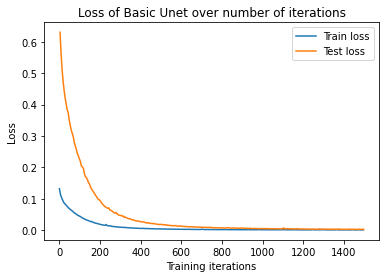

[0.017774084582924843, 0.01673290692269802, 0.017445681616663933, 0.016172243282198906, 0.017300110310316086, 0.015464811585843563, 0.01541933510452509, 0.015226319432258606, 0.014614830724895, 0.014195437543094158, 0.013895172625780106, 0.013800343498587608, 0.013678885996341705, 0.01361857634037733, 0.014608561992645264, 0.012567454017698765, 0.012449512258172035, 0.01214899867773056, 0.013516451232135296, 0.012424702756106853, 0.011913415044546127, 0.01159326359629631, 0.011278044432401657, 0.0117234718054533, 0.010709693655371666, 0.011215702630579472, 0.010553749278187752, 0.010476970113813877, 0.0102574797347188, 0.010213831439614296, 0.010347689501941204, 0.00972437858581543, 0.010350474156439304, 0.009718888439238071, 0.009709273464977741, 0.009518095292150974, 0.009286319836974144, 0.009258062578737736, 0.009135441854596138, 0.00891895405948162, 0.008768334053456783, 0.008776061236858368, 0.008491309359669685, 0.008559116162359715, 0.008361919783055782, 0.00857544969767332, 0.

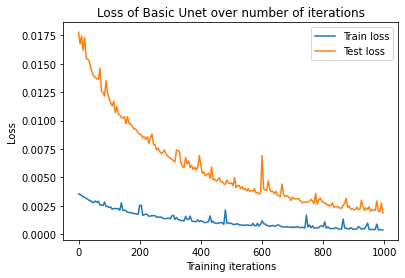

In [34]:
from trainingFunctionality import visualizeLoss #need to fix
visualizeLoss("Basic Unet", 5, trainLoss, testLoss)
visualizeLoss("Basic Unet", 5, trainLoss[100:], testLoss[100:]) #something funky going on. Why does it stop at 1000 and not 1300??

In [32]:
from sklearn.metrics import f1_score
#Visualize a prediction of transIter

#Make test dataset
testData = SynData("SynData/SynInput/", "SynData/SynLabel/")
testLoader = td.DataLoader(testData, shuffle=True)

# Check if works with batches
def testNet(net, testLoader, illustrate=False):
    testIter = iter(testLoader)
    acum_score = 0
    for i in range(len(testIter)):
        test_input, test_lab_orig = next(testIter)
        #predict
        test_input, test_lab = test_input.to(device), test_lab_orig.to(device)
        #detach from device
        test_out = (net(test_input.float())).cpu().detach() #put output back on cpu
        #formatér
        orig_lab = test_lab_orig.numpy()[0]
        pred_lab = np.array(test_out.numpy()[0] > 0.5).astype(int)
        #compute f1 score
        score = f1_score(orig_lab[0], pred_lab[0], average="micro")
        acum_score += score

        if illustrate:
            print("actual label:")
            plt.imshow(torchvision.utils.make_grid(test_lab_orig).numpy()[0], cmap="gray", vmin=0, vmax=1)
            plt.show()
            print("predicted lab:")
            plt.imshow(torchvision.utils.make_grid(test_out).numpy()[0] > 0.5, cmap="gray", vmin=0, vmax=1)
            plt.show()
        #print f1 score
        print("f1 score: {0:.5f}".format(score))
        print()
    print("Mean f1 score: {0:.5f}".format(acum_score/len(testLoader)))

testNet(unetBasic, testLoader)

f1 score: 0.99931

f1 score: 0.99946

f1 score: 0.99937

f1 score: 0.99913

f1 score: 0.99939

f1 score: 0.99939

f1 score: 0.99953

f1 score: 0.99903

f1 score: 0.99946

Mean f1 score: 0.99934


Kill all files created in this session, such to diminish clutter

In [33]:
#kill generated files such that we diminish clutter
from synDataFunctionality.saveSynData import order_66

#order_66("SynDat/synInputTrain", "SynDat/synLabelTrain")
